In [1]:
import numpy as np
import os
import nrrd
import h5py
import pandas
import json
from data import *

/home/davech2y/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# database_root = "/mnt/raid/davech2y/ShapeNetCore_vol/"
# database_name = "nrrd_256_filter_div_32_solid.hdf5"
# database = h5py.File(os.path.join(database_root, database_name), "w")

# shapenet_root = "/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_32_solid/"
# shapenet_csv = pandas.read_csv("captions.tablechair.csv")
# shapenet_shapepath = [
#     os.path.join(shapenet_root, model_name, model_name + '.nrrd') for model_name in shapenet_csv.modelId.values.tolist()
# ]
# shapenet_size = len(shapenet_shapepath)
# shapenet_shape = [3, 32, 32, 32]
# shapenet_shape_flat = np.prod(shapenet_shape)

# shapenet_dataset = database.create_dataset("shapes", (shapenet_size, shapenet_shape_flat), dtype="float")

# for i, shapepath in enumerate(shapenet_shapepath):
#     if i % 100 == 0: 
#         print("preprocessed and stored: ", i)
#     shape, _ = nrrd.read(shapepath)
#     shape = np.reshape(shape[:3], (-1))
#     shape = (shape - np.min(shape)) / (np.max(shape) - np.min(shape))
#     shapenet_dataset[i] = shape

In [2]:
coco_root = "/mnt/raid/davech2y/COCO_2014/"
coco_train = os.path.join(coco_root, "train2014")
coco_valid = os.path.join(coco_root, "valid2014")
coco_test = os.path.join(coco_root, "test2014")
coco_train_cap = os.path.join(coco_root, "annotations", "captions_train2014.json")
coco_valid_cap = os.path.join(coco_root, "annotations", "captions_val2014.json")

In [7]:
coco_valid = COCO(pandas.read_csv(os.path.join(coco_root, "preprocessed", "coco_val2014.caption.csv")), 100)

In [13]:
pandas.read_csv(os.path.join(coco_root, "preprocessed", "coco_val2014.caption.csv")).sample(frac=1).reset_index(drop=True)

,image_id,caption,file_name
0,338417,A crowd of people standing at a social get tog...,COCO_val2014_000000338417.jpg
1,206356,A baseball player is holding a bat in preparat...,COCO_val2014_000000206356.jpg
2,58344,there is a large building that has two clocks ...,COCO_val2014_000000058344.jpg
3,340884,a elephant walking in a dusty and rocky area,COCO_val2014_000000340884.jpg
4,293057,A person on a snowboard jumping off a pile of ...,COCO_val2014_000000293057.jpg
5,173772,Group of people playing soccer in the snow.,COCO_val2014_000000173772.jpg
6,363039,this is a bird flying in the sky with its wings,COCO_val2014_000000363039.jpg
7,231097,A plate is left sitting half eaten with mostly...,COCO_val2014_000000231097.jpg
8,388225,A man and a woman enjoying the Nintendo Wii.,COCO_val2014_000000388225.jpg
9,285645,a person riding skis holding on to a parachute,COCO_val2014_000000285645.jpg


In [9]:
coco_valid_ds = COCOCaptionDataset(
    coco_root, 
    coco_valid.transformed_csv,
    os.path.join(coco_root, "preprocessed", "coco_val2014.hdf5")
)

In [6]:
len(train)

29

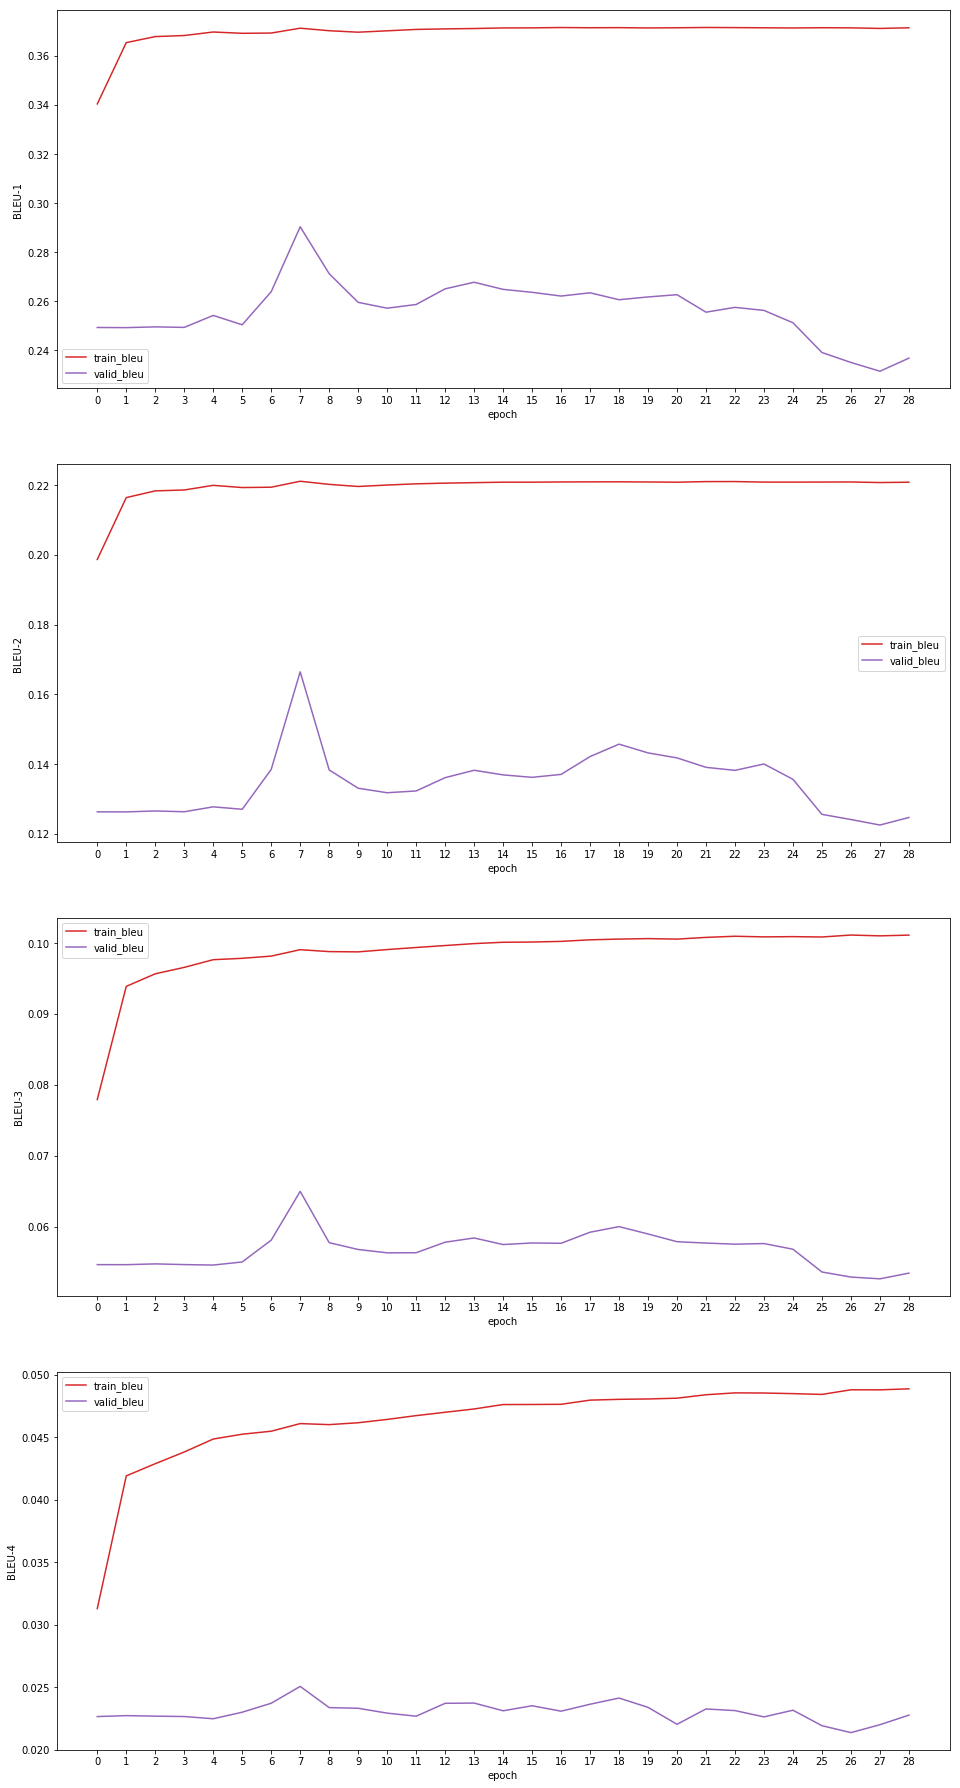

In [13]:
import matplotlib.pyplot as plt

root = "/home/davech2y/3d_captioning/logs/bad/"
fig = plt.gcf()
fig.set_size_inches(16,32)
fig.set_facecolor("white")
for i in range(1, 5):
    temp = json.load(open(os.path.join(root, "run_coco_vgg16_bn_attention_trs-1_vs5000_ts0_e30_lr0.000100_wd0.000000_bs24_vocal5001_BLEU_BLEU-{}_train_bleu_{}-tag-BLEU_BLEU-{}.json".format(i, i, i))))
    train = [temp[i][2] for i in range(len(temp))]
    temp = json.load(open(os.path.join(root, "run_coco_vgg16_bn_attention_trs-1_vs5000_ts0_e30_lr0.000100_wd0.000000_bs24_vocal5001_BLEU_BLEU-{}_valid_bleu_{}-tag-BLEU_BLEU-{}.json".format(i, i, i))))
    valid = [temp[i][2] for i in range(len(temp))]
    plt.subplot(4, 1, i)
    plt.plot(range(0, 29), train, "C3", label="train_bleu")
    plt.plot(range(0, 29), valid, "C4", label="valid_bleu")
    plt.xlabel('epoch')
    plt.ylabel('BLEU-{}'.format(i))
    plt.xticks(range(0, 29))
    plt.legend()
plt.show()